In [3]:
#Load in required libraries, if you have not installed these libraries, you can use the install.packages command 
library(data.table)
library(tidyverse)
library(forecast)
library(lmtest)
library(plyr)
library(lmtest)
library(ggplot2)
library(scales)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [4]:
getwd()

[1] "/Users/Ryan/Desktop/datareach/disease prediction"

In [43]:
#read in the cleaned data file
data<-read_csv('SG14-17.csv', col_names=FALSE)

Parsed with column specification:
cols(
  .default = col_integer(),
  X1 = col_character(),
  X2 = col_character(),
  X25 = col_double()
)
See spec(...) for full column specifications.


In [44]:
data

X1        X2                X3  X4  X5  X6  X7  X8  X9  X10 ⋯ X201 X202
1   ADAMAOUA  BANKIM              1   0   7   2   7   1   1   4 ⋯  NA   NA 
2   ADAMAOUA  BANYO               0  NA   2  NA   5   0   1   0 ⋯  NA    7 
3   ADAMAOUA  DJOHONG             3   4   1   2   0   0   1   1 ⋯  18    1 
4   ADAMAOUA  MEIGANGA            2   0   2   0  NA   1   0   4 ⋯   0    0 
5   ADAMAOUA  NGAOUNDAL           2   9   0   0   5   0   0   6 ⋯  12   11 
6   ADAMAOUA  NGAOUNDERE RURAL   84  79  59  78  53  43  72  64 ⋯ 106  213 
7   ADAMAOUA  NGAOUNDERE URBAIN  55  72  95  76 116  88 102  92 ⋯ 124  169 
8   ADAMAOUA  TIBATI              7  15   9  12  14  10  12   4 ⋯  14   12 
9   ADAMAOUA  TIGNERE            27   0  27  27  17   4  14   0 ⋯  38   23 
10  CENTRE    AKONOLINGA          0   1   0   2   1   0   0   0 ⋯   1    8 
11  CENTRE    AWAE                0   5   0   1   1   0   0   0 ⋯   6    1 
12  CENTRE    AYOS                0   0   0   2   3   0   0   0 ⋯   0    7 
13  CENTRE    BAFIA              12  20   2   7   7   0   6   7 ⋯   5   17 
14  CENTRE    BIYEM ASSI        159  94 106  89  66 104  86  85 ⋯  73   61 
15  CENTRE    CITE VERTE         31  34  30  33  18  52  28  28 ⋯  32   42 
16  CENTRE    DJOUNGOLO         158 148 180 120 107 138 153 127 ⋯ 185  182 
17  CENTRE    EBEBDA              6   7   6   2   1   3   1   3 ⋯   0    0 
18  CENTRE    EFOULAN            30   0  31  34  29  26   0  13 ⋯ 141   39 
19  CENTRE    ELIG MFOMO         12   8   3   7   2   2   4   5 ⋯   4    6 
20  CENTRE    ESEKA               0   1   6   2   8   0   3   2 ⋯   0   NA 
21  CENTRE    ESSE                0   0   7   4  11  13   7   3 ⋯  14   23 
22  CENTRE    EVODOULA           14   3   7   4   0   0   4   1 ⋯   0   NA 
23  CENTRE    MBALMAYO            3   4   2   6  49   0  10  13 ⋯  16   19 
24  CENTRE    MBANDJOCK           1   4   4   5   2   3   2   1 ⋯   5   39 
25  CENTRE    MBANKOMO            2   3   4   1   1   5   0  16 ⋯  10    9 
26  CENTRE    MFOU                0   8   8  11  30   0   2   7 ⋯  93   51 
27  CENTRE    MONATELE           NA   3   0   0   0   1   7   3 ⋯   8    4 
28  CENTRE    NANGA EBOKO        15   2   1   4   2   0   0   0 ⋯   5    4 
29  CENTRE    NDIKINIMEKI        10   0   8   7   0   0   0   0 ⋯   0    0 
30  CENTRE    NGOG MAPUBI         3   0   0   4   8   0   3   5 ⋯  18   16 
⋮   ⋮         ⋮                 ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋱ ⋮    ⋮   
160 OUEST     PENKA MICHEL        0  0    0   0  0   2   0   1  ⋯   0    0 
161 OUEST     SANTCHOU            3  0    1   0  2   1   1   0  ⋯   2    0 
162 SUD       AMBAM              27 10    3   8  5   7   5   8  ⋯  13    8 
163 SUD       DJOUM               7  1    2   3  2   0   1   1  ⋯   5    8 
164 SUD       EBOLOWA             1  3    0   0  4   0   0   0  ⋯  14   33 
165 SUD       KRIBI             126 16  104  78 17  79   2  16  ⋯  11   11 
166 SUD       LOLODORF            1  2    3   1  3   4   1   1  ⋯   1    1 
167 SUD       MEYOMESSALA        14  7    5  18  0  10  15  16  ⋯   9   13 
168 SUD       MVANGAN             0  0    0   0  0   0   0   0  ⋯   4   13 
169 SUD       OLAMZE              6  5    1   3  3   4   3   4  ⋯   2    3 
170 SUD       SANGMELIMA          9  2   28  16  3   1   3   2  ⋯  10   15 
171 SUD       ZOETELE             0  3    1   0  0   0   0   0  ⋯   3    3 
172 SUD OUEST AKWAYA              0  3    0   0  0   0   0   0  ⋯   0    0 
173 SUD OUEST BAKASSI             3  1    0   1  2   0   0   0  ⋯   0    0 
174 SUD OUEST BANGEM              5  5    2   4 11   5   2   2  ⋯   1    0 
175 SUD OUEST BUEA               10 19   15   8 12  33  16  20  ⋯   0   15 
176 SUD OUEST EKONDO TITI        11  9    0  18  8  14   7   8  ⋯   6   16 
177 SUD OUEST EYUMODJOCK          4  4    5   8  0   1   2   2  ⋯   0    0 
178 SUD OUEST FONTEM              4  2    1   3  2   1   0   0  ⋯   0    0 
179 SUD OUEST KONYE               7 13   14  13  0  12   9  11  ⋯   0    0 
180 SUD OUEST KUMBA              13 11    1   1 19  

In [45]:
dim(data)

[1] 189 210

In [46]:
#convert data to numerical type
cols = c(3:210)
data[,cols] = apply(data[,cols], 2, as.numeric)

In [47]:
# replace NA with mean of predecessor and follower
N <- nrow(data)
data_noNA <- as.tibble(cbind(data))
for ( r in 1:N ){
    for ( c in cols ){
        if (is.na(data[r,c])){
            # find the prev
            has_prev <- FALSE
            for (i in c:3){
                if (!is.na(data[r,i])){
                    has_prev <- TRUE
                    prev <- data[r,i]
                    break
                }
            } 
            # find post
            has_post <- FALSE
            for (j in c:ncol(data)){
                if (!is.na(data[r,j])){
                    has_post <- TRUE
                    post <- data[r,j]
                    break
                }
            }
            data_noNA[r,c] <- 0
            if (has_prev){
                data_noNA[r,c] <- data_noNA[r,c]+prev
            }
            if (has_post){
                data_noNA[r,c] <- (data_noNA[r,c]+post)/(1+has_prev)
            }
        } 
    }
}

In [48]:
r = 3
data_noNA[r,]
data[r,]
any(is.na(data_noNA))

X1       X2      X3 X4 X5 X6 X7 X8 X9 X10 ⋯ X201 X202 X203 X204 X205 X206
1 ADAMAOUA DJOHONG 3  4  1  2  0  0  1  1   ⋯ 18   1    0    6    17   0   
  X207 X208 X209 X210
1 0    2    2    12

X1       X2      X3 X4 X5 X6 X7 X8 X9 X10 ⋯ X201 X202 X203 X204 X205 X206
1 ADAMAOUA DJOHONG 3  4  1  2  0  0  1  1   ⋯ 18   1    0    6    17   0   
  X207 X208 X209 X210
1 0    2    2    12

[1] FALSE

In [49]:
index2region <- function(index){
    return( paste(data_noNA[index,3],data_noNA[index,2],sep=",") )
}

In [50]:
five_week_weighted_sum <- function(CrossCorr){
score <- 0
for (lag in -5:5){
    corr <- CrossCorr[lag][[1]]
    score <- score + 10.0/(abs(lag)+1)*corr
}
return(score)
}

In [51]:
### source: http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/xegbohtmlnode39.html
### source: https://stackoverflow.com/questions/15551209/cross-correlation-using-ccf-in-r
calc_upperCI <- function(T, confidence){
    CI <- qnorm((1 + confidence)/2)/sqrt(T)
    return (CI)
}

In [52]:
#functin to compute score matrix
score_mat <- function(begin,end){
    res <- matrix(nrow=N, ncol=N)
# the (i,j) entry of score mat correspond to ccf(i,j)
    for (i in 1:N){
        for (j in 1:N){
            if (j > i){
            TS1<-as.ts(as.numeric(data_noNA[i, begin:end])) 
            TS2<-as.ts(as.numeric(data_noNA[j, begin:end]))
            CrossCorr<-ccf(TS1, TS2, lag = 5, pl = FALSE)
            res[i,j] <- five_week_weighted_sum(CrossCorr)
            }
        }
    }
    res
}

In [53]:
process_scores<- function(score_mat){
    # summary stats of scores
    scores = c(score_mat)
    print(summary(scores))
    print ( c("Mean: ",mean(scores,na.rm = TRUE)) )
    print( c("SD: ",sd(scores,na.rm = TRUE)) )
    hist(scores,
         breaks=50, freq=FALSE,
         main="Histogram of Correlation Scores",
         xlab="Correlation Score",
         col="steelblue")
    # heatmap of score matrix
    melted_score = melt(score_mat, na.rm = TRUE) 
    colnames(melted_score) <- c("Region1", "Region2", "Score")
    ggplot(data=melted_score, aes(x=Region1, y=Region2, fill=Score)) +
    geom_tile(colour="white") +
    scale_fill_gradient2(low = "#a6611a", high = "#018571", mid = "#f5f5f5", midpoint = 0)
}

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-14.254  -1.745   0.798   1.327   4.061  18.721   21356 
[1] "Mean: "           "1.32672975341868"
[1] "SD: "             "4.48108884281687"


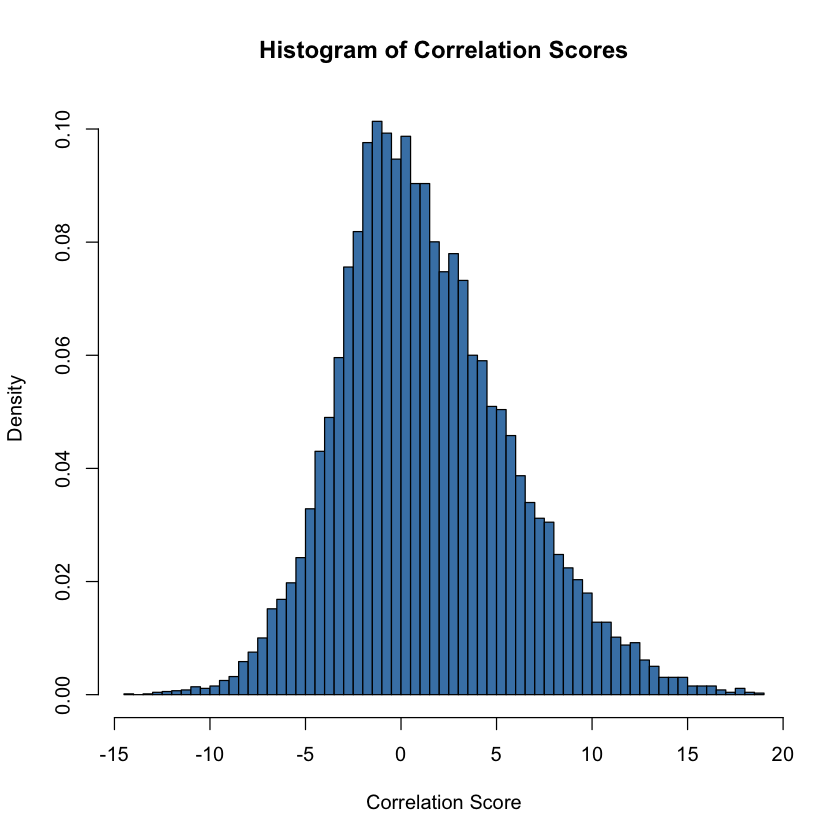

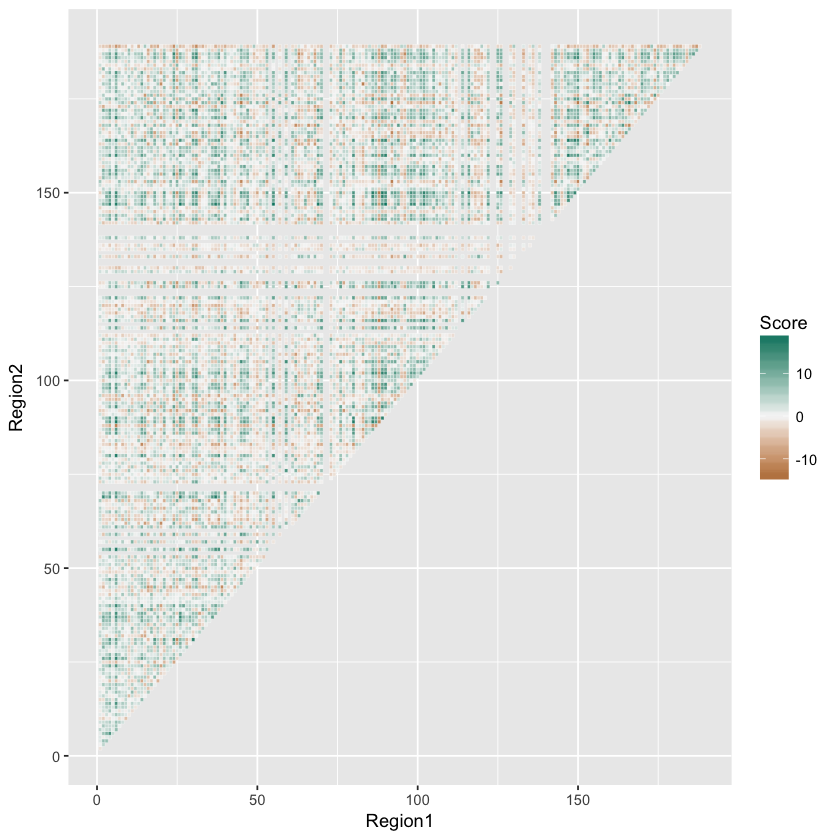

In [54]:
##########################
#       2014-2015        #
##########################
score_mat_14 <- score_mat(3,54)
process_scores(score_mat_14)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-18.070  -1.996   0.312   0.664   3.179  20.139   21693 
[1] "Mean: "            "0.664119024955476"
[1] "SD: "             "4.32814806989275"


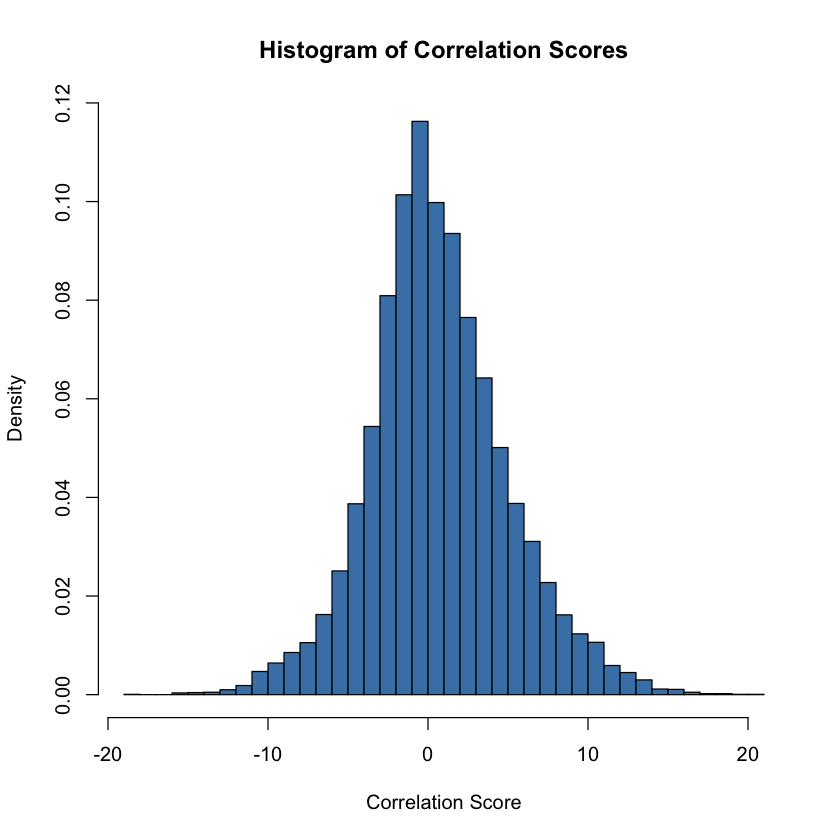

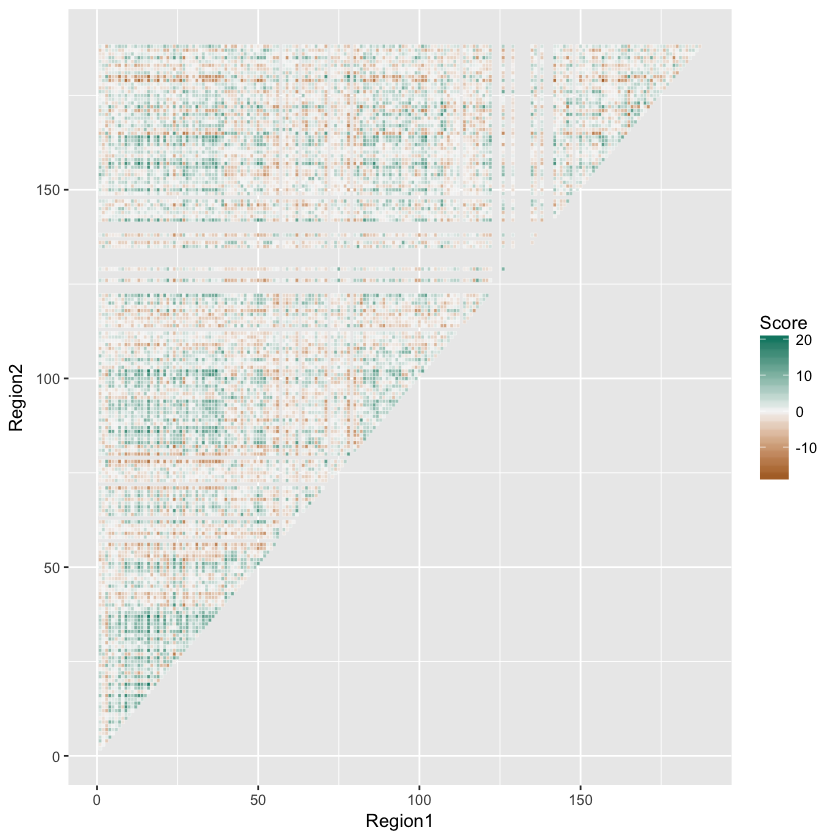

In [56]:
##########################
#       2016-2017        #
##########################
score_mat_16 <- score_mat(107,158)
process_scores(score_mat_16)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-20.328  -1.421   0.602   1.024   3.299  21.155   19790 
[1] "Mean: "           "1.02387044984135"
[1] "SD: "             "4.13050003331851"


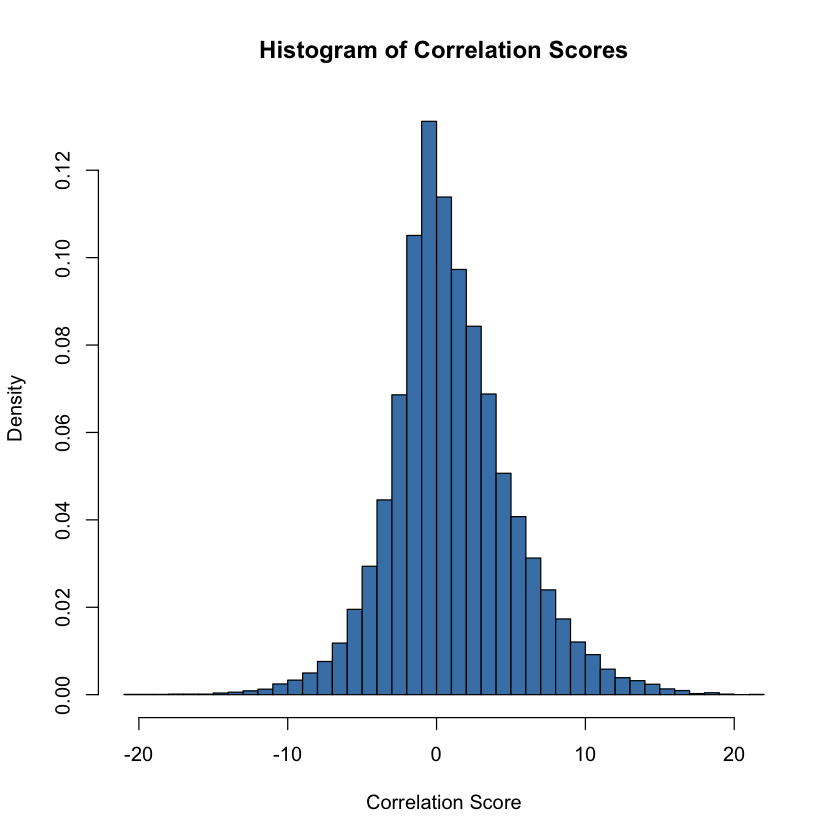

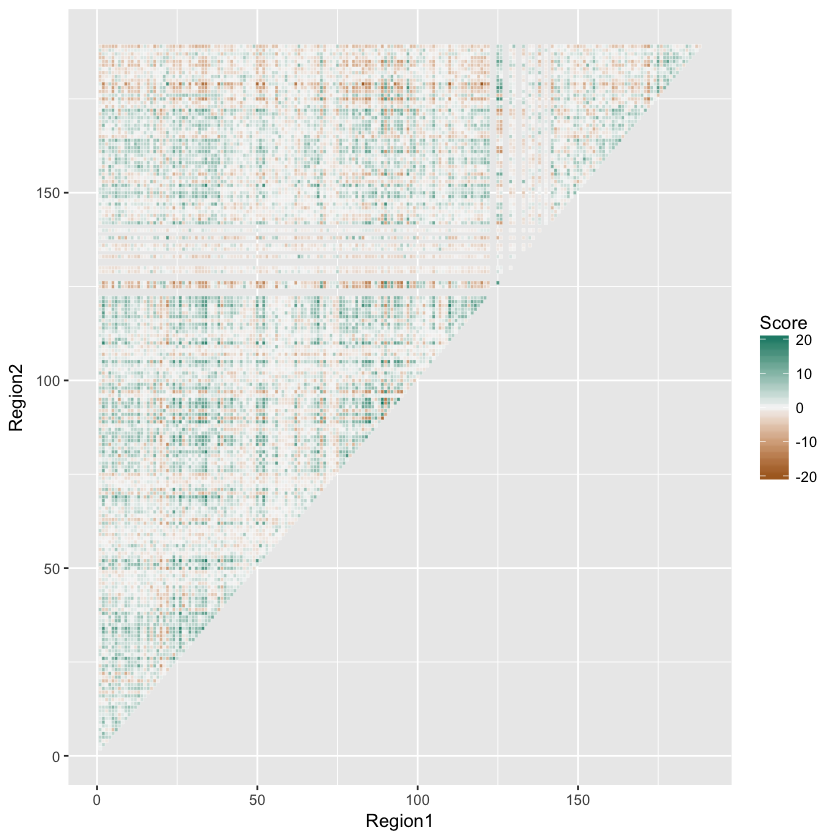

In [58]:
##########################
#       2014-2017        #
##########################
score_mat_4yrs <- score_mat(3,ncol(data_noNA))
process_scores(score_mat_4yrs)

In [59]:
# Given two indices, plot their corrsponding time series
# if ccf_disp is TRUE, also plot the output graph of ccf function
visualize_corr <- function(index1, index2, ccf_disp=FALSE){
    TS1<-ts(as.numeric(data_noNA[index1, 4:ncol(data_noNA)])) 
    TS2<-ts(as.numeric(data_noNA[index2, 4:ncol(data_noNA)]))

    ts.plot(TS1, TS2,
           gpars=list(xlab="Week", ylab="Cases", col=c("red","blue")))
    legend("topleft",legend=c( paste(toString(index1),index2region(index1)), paste(toString(index2),index2region(index2))),
           col=c("red", "blue"),lty=c(1,1))

    CrossCorr<-ccf(TS1, TS2, lag = 5, pl = ccf_disp)
    score <- five_week_weighted_sum(CrossCorr)[[1]]

    title(sub = paste( "Correlation Score =",toString(score) ))
    if (ccf_disp){
        upperCI <- calc_upperCI(CrossCorr$n.used, 0.95)
        lowerCI <- -upperCI
        # verify CI
        lags <- -5:5
        my_upperCI <- rep(upperCI,11)
        points(lags, my_upperCI, col = "red")
        my_lowerCI <- rep(lowerCI,11)
        points(lags, my_lowerCI, col = "red")
        }
}

In [60]:
# Given a score matrix, and an interger k
# visualize_corr for top/bottom k scores(depending on the value of top)
# in the increasing order of scores
# ccf_disp dictates if the output graph of ccf is displayed
visualize_top_k <- function(score_mat, k, top=TRUE, ts_disp=TRUE, ccf_disp=FALSE){
    sorted_scores = sort(c(score_mat))
    bottom_k = sorted_scores[1:k]
    top_k = tail(sorted_scores,k)
    print(top_k)
    pairs<-c()
    if (top) {k_scores<-top_k} else {k_scores<-bottom_k}
    for (score in k_scores){
        index_pair = which(score_mat == score, arr.ind = TRUE)
        i<-index_pair[1]
        j<-index_pair[2]
        pairs<-c(pairs,paste(index2region(i),'X',index2region(j)))
        if (ts_disp) {
            visualize_corr(i,j,ccf_disp)
        }
    }
    print(pairs)
}

In [61]:
# 14-15 top10 region pairs
visualize_top_k(score_mat_14,10,top=TRUE,ts_disp=FALSE,ccf_disp=FALSE)

 [1] 17.57359 17.58986 17.70069 17.70952 17.83069 18.00237 18.04661 18.42083
 [9] 18.70216 18.72064
 [1] "17,ROUA X 1,DIBOMBARI"             "1,DIBOMBARI X 2,DSCHANG"          
 [3] "84,NGAOUNDERE RURAL X 6,BOURHA"    "0,BANGANGTE X 1,EBOLOWA"          
 [5] "84,NGAOUNDERE RURAL X 17,ROUA"     "9,MAROUA 1 X 0,BANGANGTE"         
 [7] "84,NGAOUNDERE RURAL X 1,DIBOMBARI" "0,MFOU X 0,BANGANGTE"             
 [9] "6,BOURHA X 0,BANGANGTE"            "0,EDEA X 0,BANGANGTE"             


In [63]:
# 16-17 top10 region pairs
visualize_top_k(score_mat_16,10,top=TRUE,ts_disp=FALSE,ccf_disp=FALSE)

 [1] 16.55203 16.79974 17.23416 17.66895 17.81935 18.01576 18.20276 18.76800
 [9] 19.54636 20.13901
 [1] "18,SAA X 1,EBOLOWA"              "158,DJOUNGOLO X 0,BONASSAMA"    
 [3] "4,MOUTOURWA X 13,KUMBA"          "158,DJOUNGOLO X 1,EBOLOWA"      
 [5] "12,ELIG MFOMO X 18,SAA"          "18,SAA X 12,NJOMBE PENJA"       
 [7] "12,BAFIA X 1,MASSANGAM"          "158,DJOUNGOLO X 12,NJOMBE PENJA"
 [9] "158,DJOUNGOLO X 12,ELIG MFOMO"   "158,DJOUNGOLO X 18,SAA"         


In [65]:
# 14-17 top10 region pairs
visualize_top_k(score_mat_4yrs,10,top=TRUE,ts_disp=FALSE,ccf_disp=FALSE)

 [1] 18.17624 18.17651 18.23658 18.28459 18.33746 18.53968 18.88588 19.36355
 [9] 19.60584 21.15533
 [1] "0,NTUI X 0,GAROUA I"       "0,MFOU X 9,MAROUA 1"      
 [3] "0,BANYO X 0,GAROUA I"      "0,MFOU X 6,NGUELEMENDOUKA"
 [5] "0,NTUI X 9,MAROUA 1"       "0,BOKO X 1,DIBOMBARI"     
 [7] "0,MFOU X 0,NTUI"           "0,NTUI X 6,NGUELEMENDOUKA"
 [9] "0,GAROUA I X 0,REY BOUBA"  "1,DIBOMBARI X 0,MANJO"    


 [1] 17.57359 17.58986 17.70069 17.70952 17.83069 18.00237 18.04661 18.42083
 [9] 18.70216 18.72064


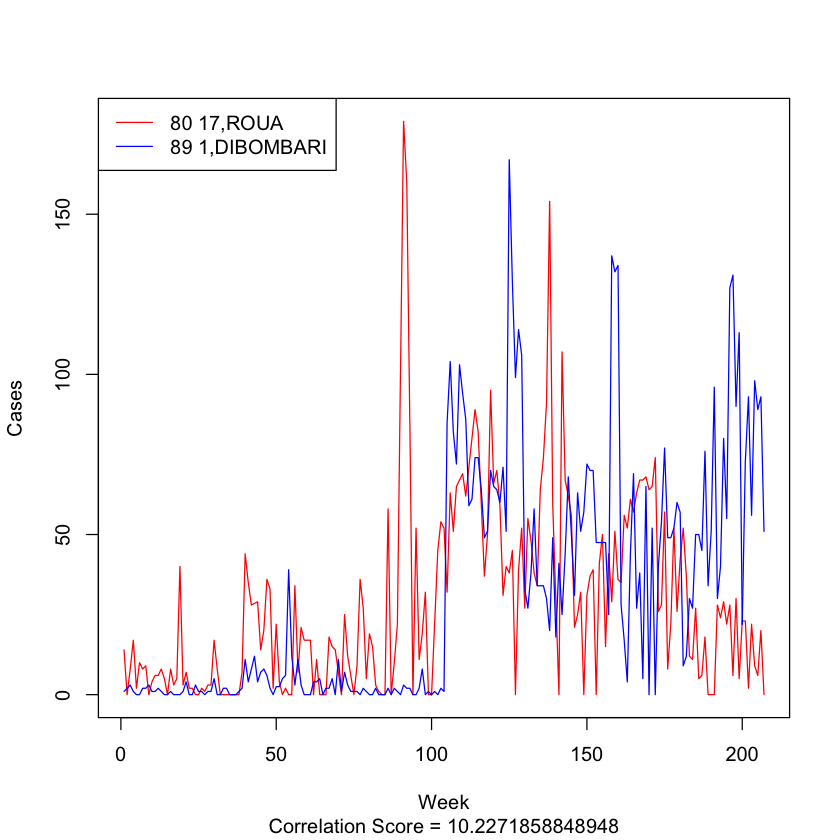

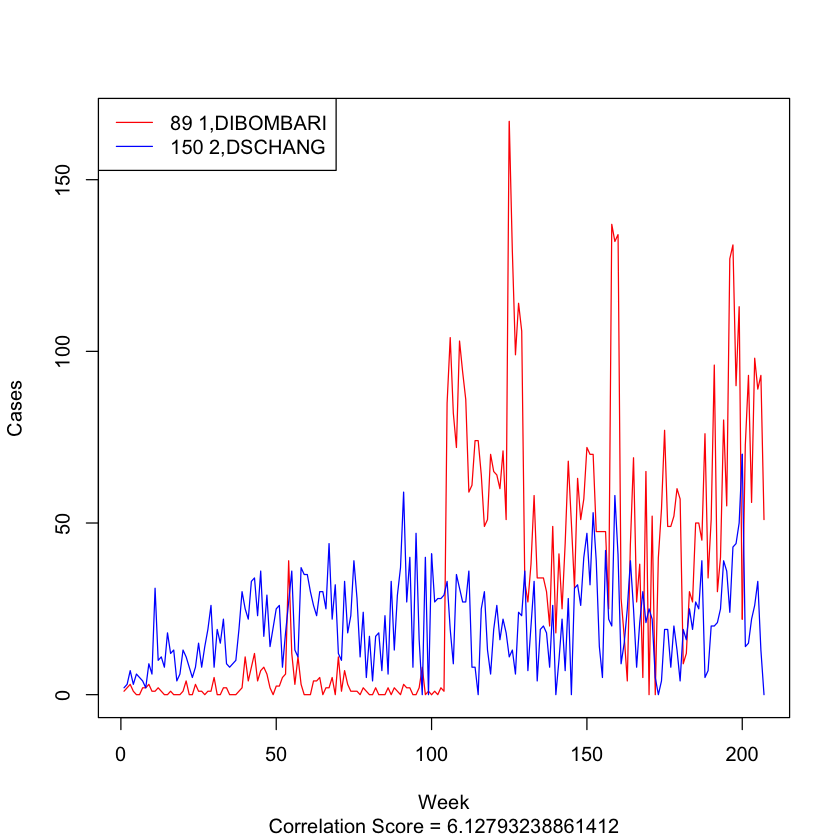

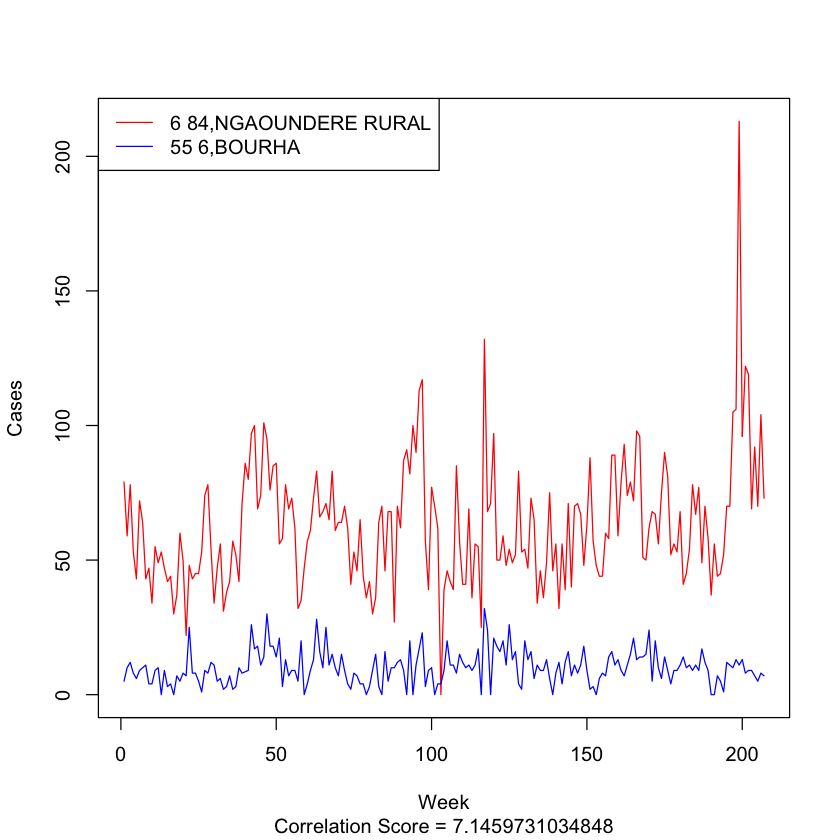

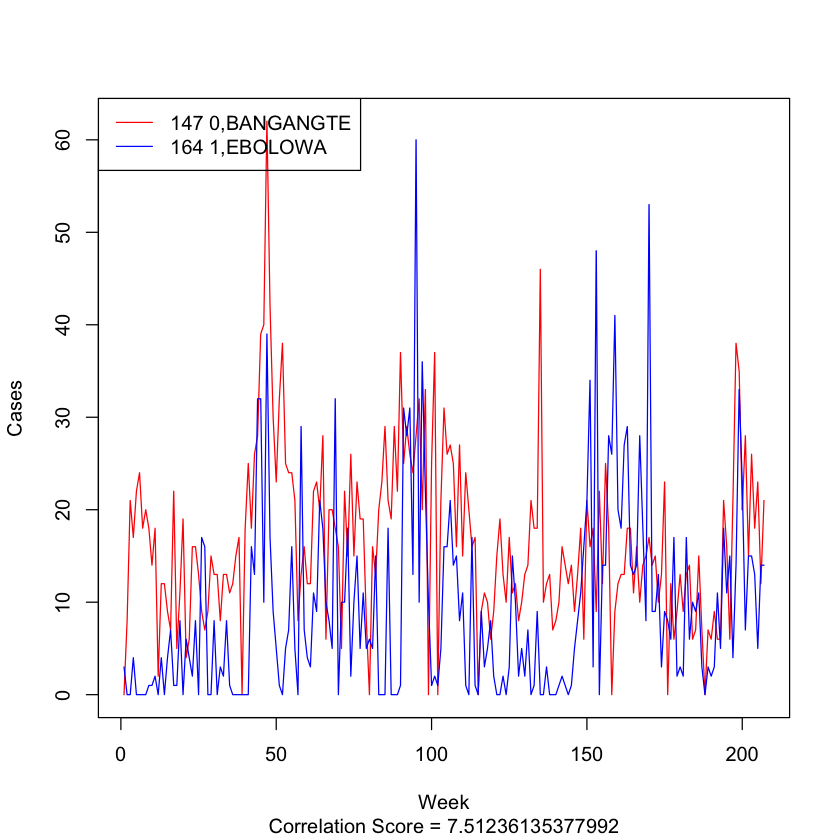

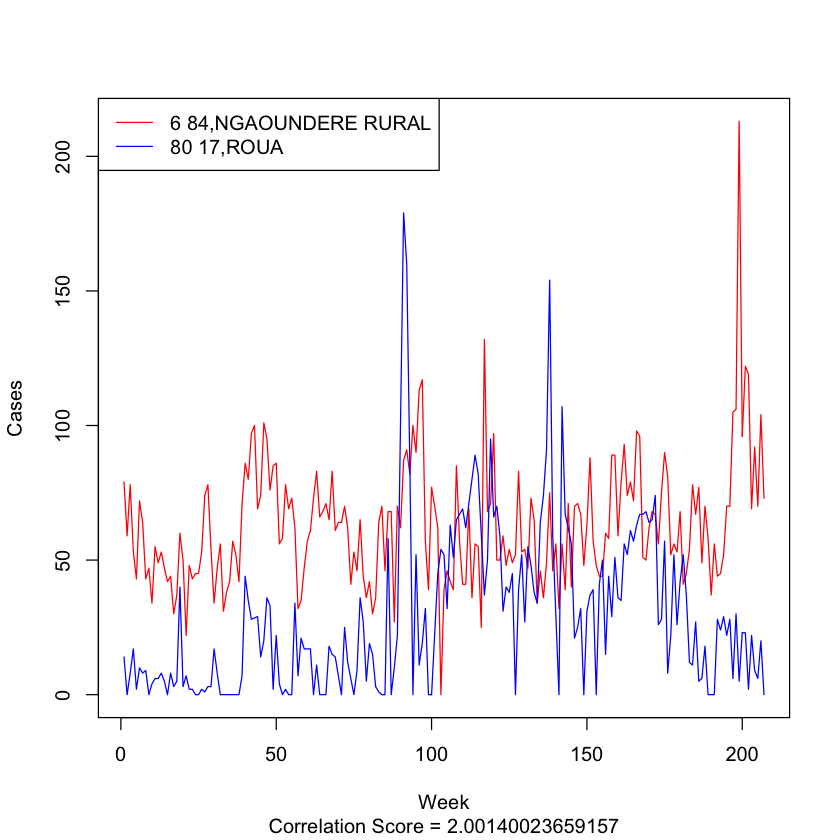

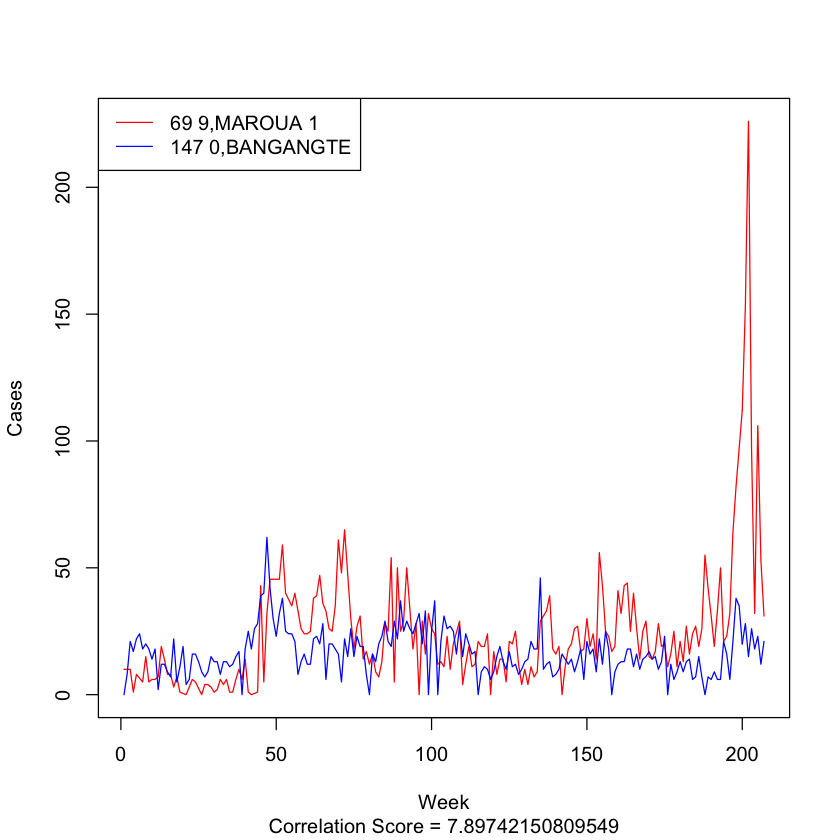

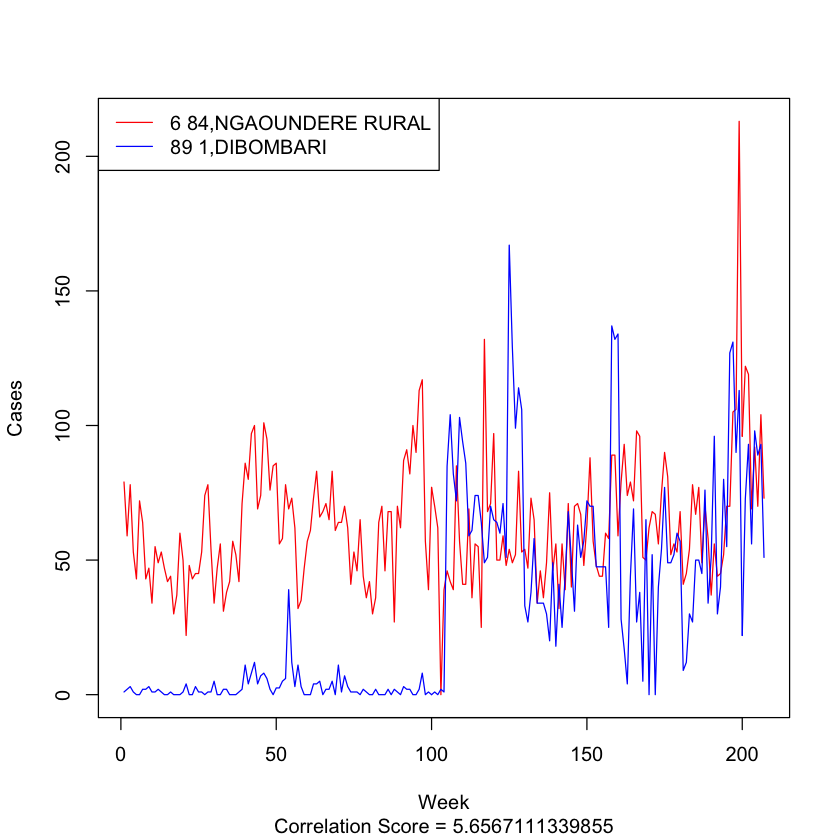

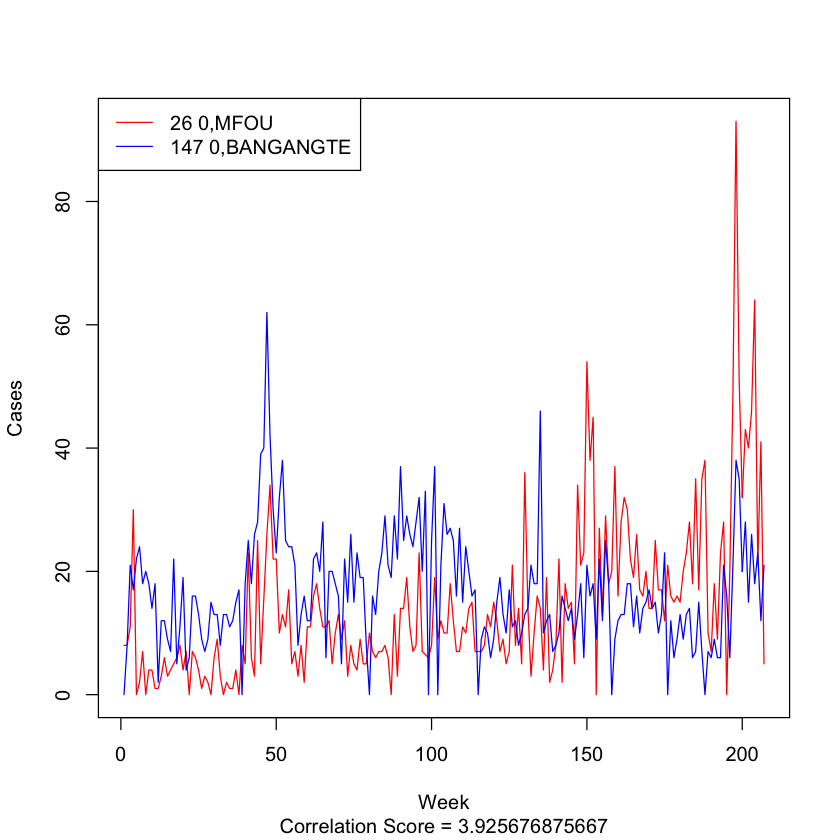

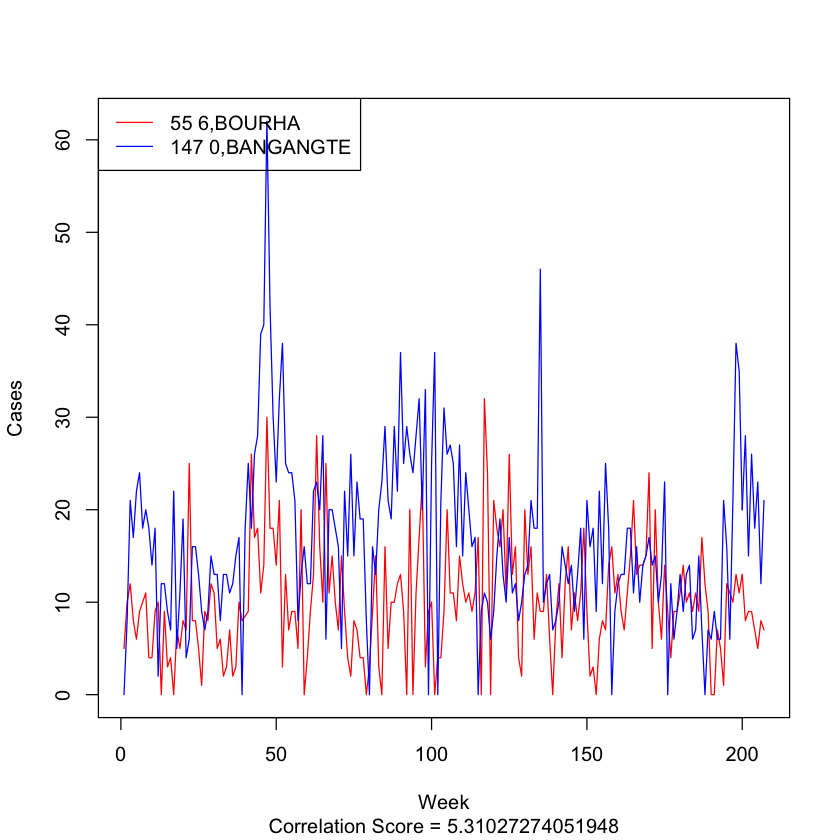

 [1] "17,ROUA X 1,DIBOMBARI"             "1,DIBOMBARI X 2,DSCHANG"          
 [3] "84,NGAOUNDERE RURAL X 6,BOURHA"    "0,BANGANGTE X 1,EBOLOWA"          
 [5] "84,NGAOUNDERE RURAL X 17,ROUA"     "9,MAROUA 1 X 0,BANGANGTE"         
 [7] "84,NGAOUNDERE RURAL X 1,DIBOMBARI" "0,MFOU X 0,BANGANGTE"             
 [9] "6,BOURHA X 0,BANGANGTE"            "0,EDEA X 0,BANGANGTE"             


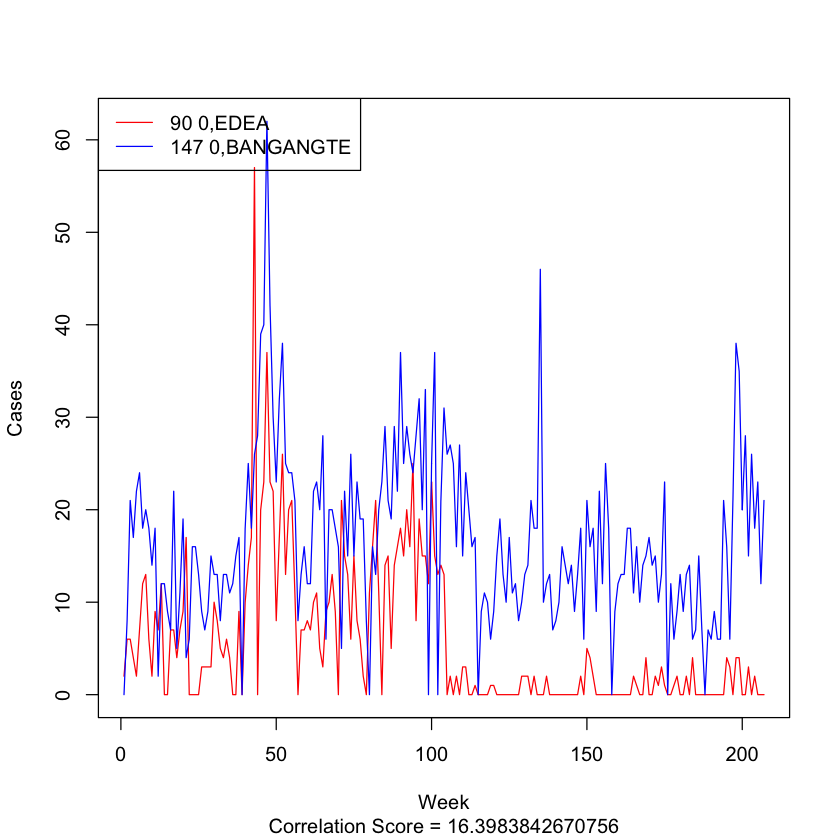

In [67]:
# visulization for top 10 scores (region pairs)
visualize_top_k(score_mat_14,10,top=TRUE,ccf_disp=FALSE)

 [1] 16.55203 16.79974 17.23416 17.66895 17.81935 18.01576 18.20276 18.76800
 [9] 19.54636 20.13901


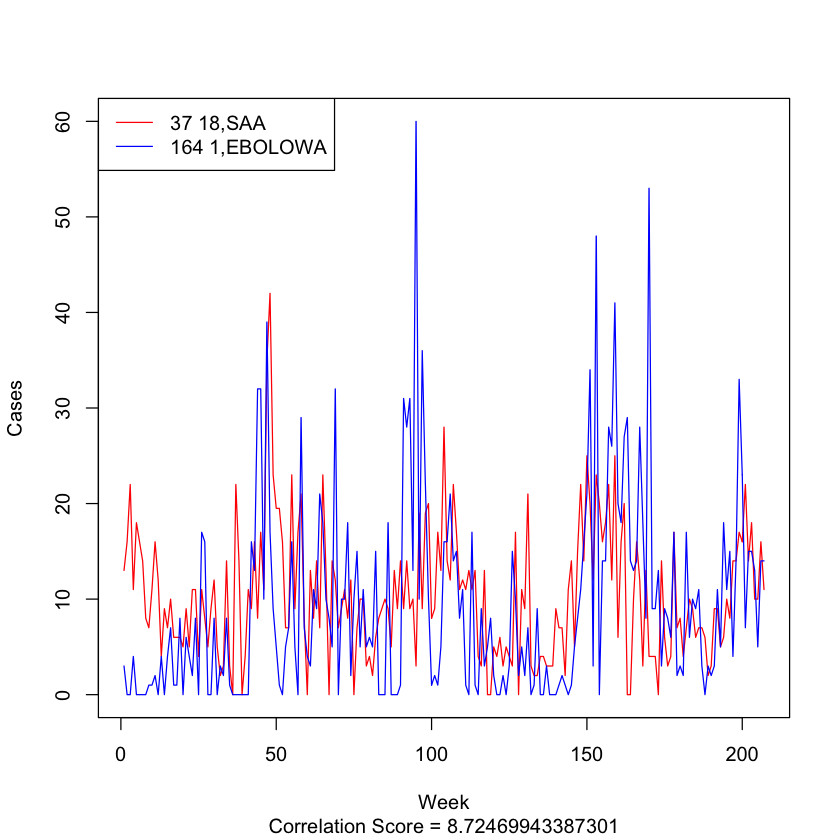

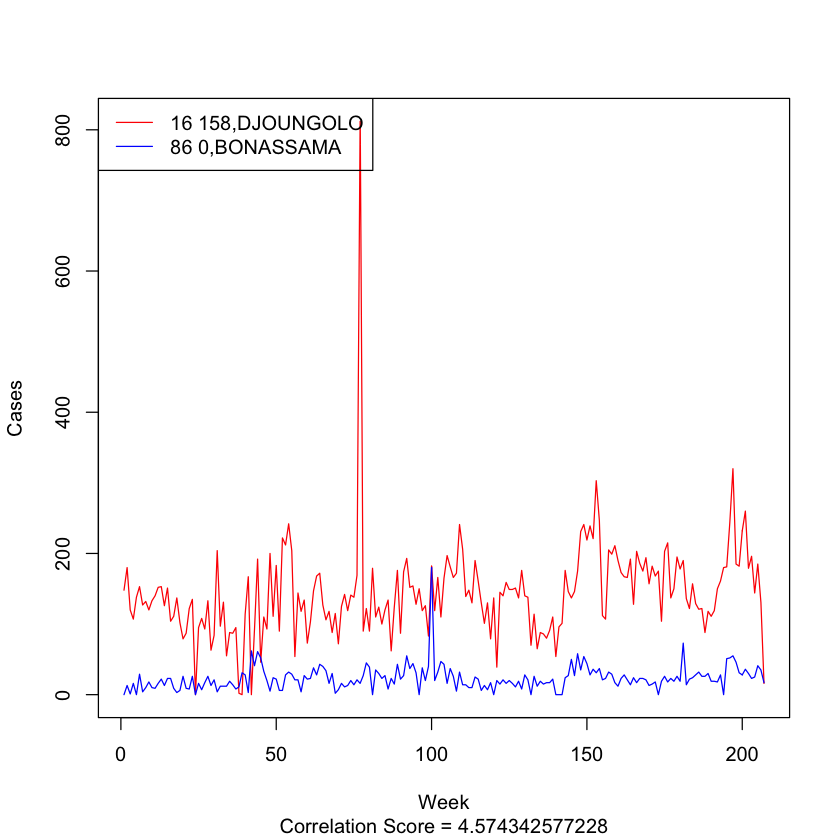

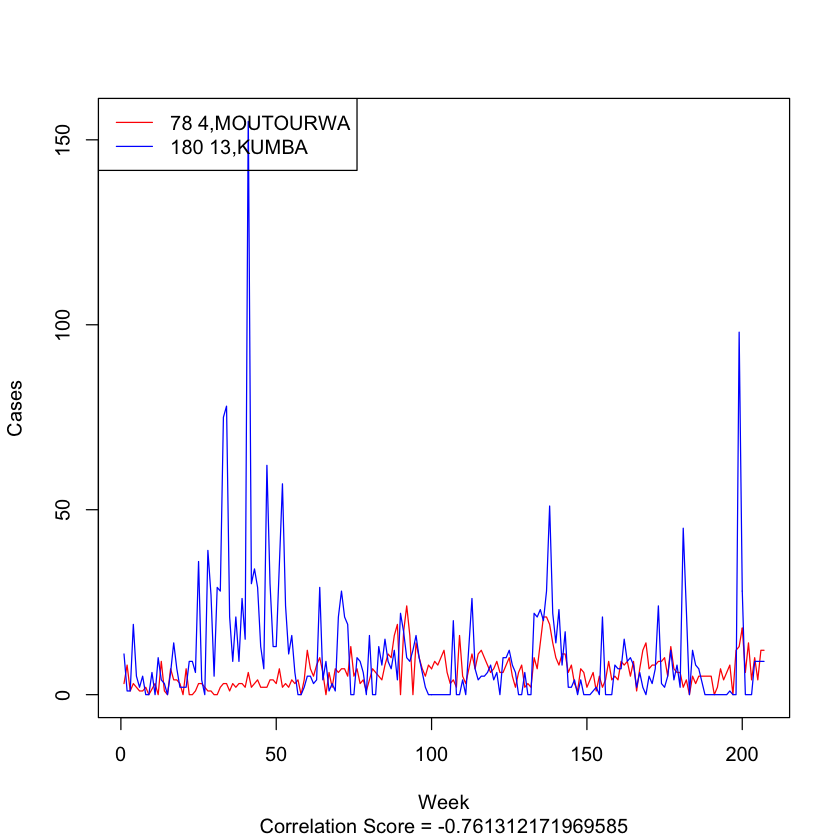

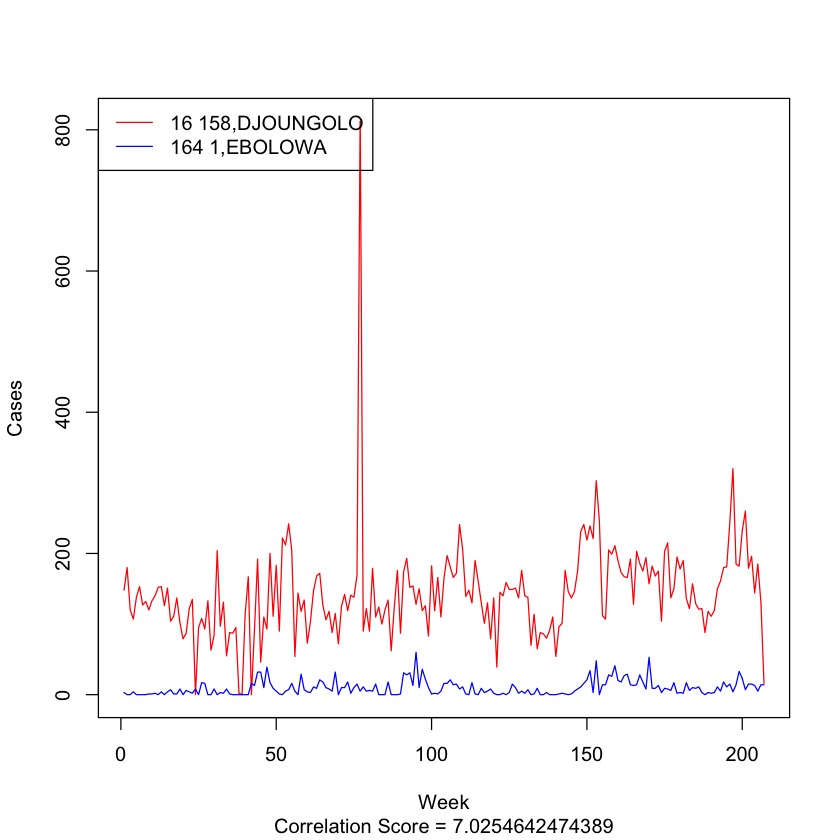

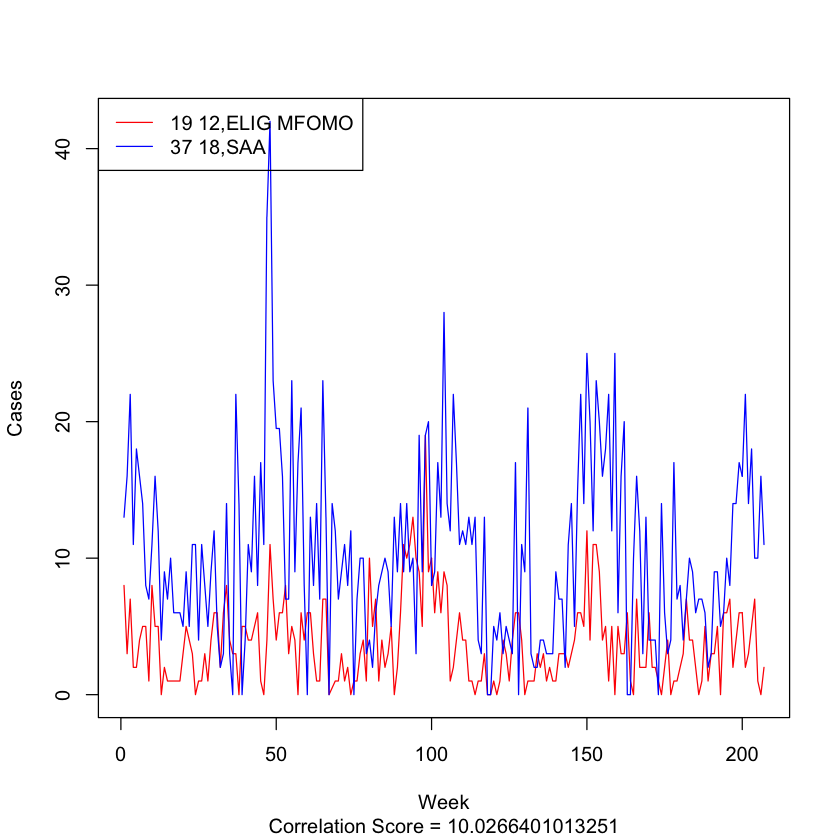

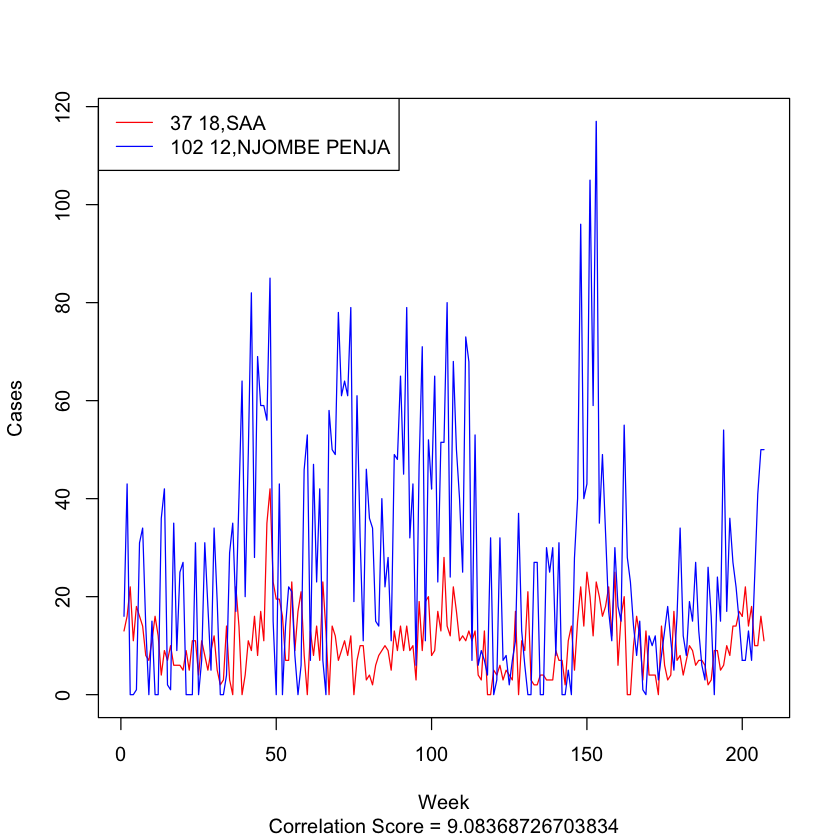

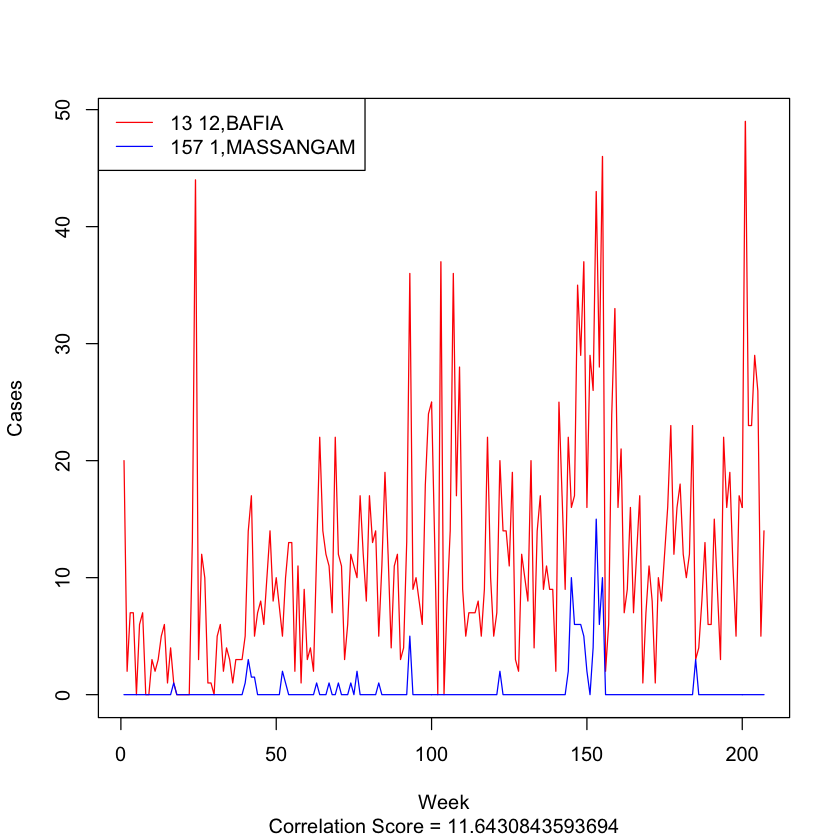

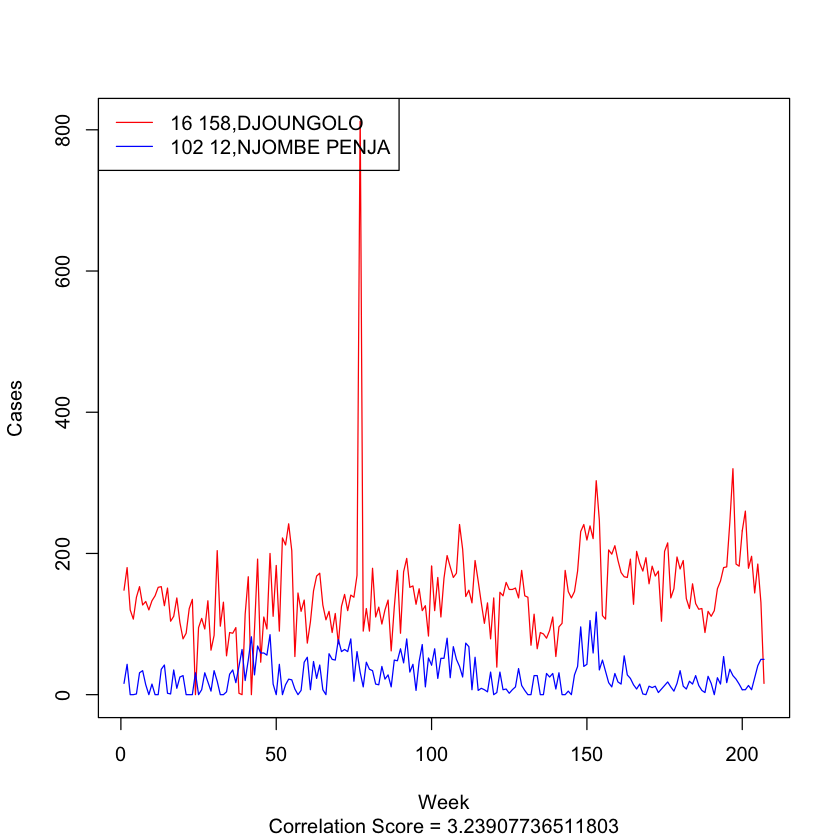

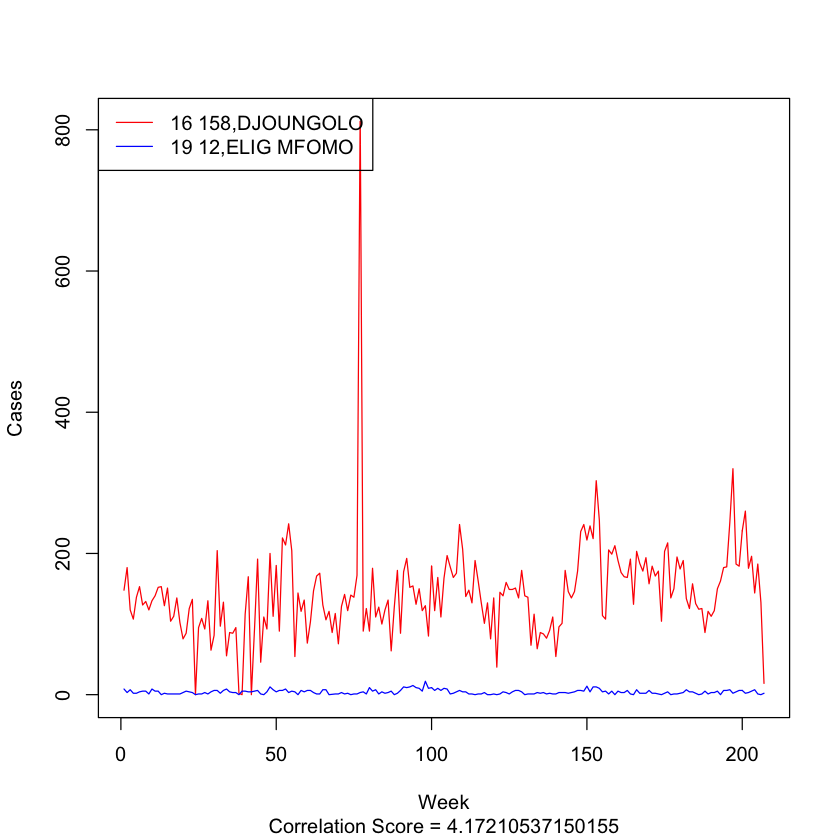

 [1] "18,SAA X 1,EBOLOWA"              "158,DJOUNGOLO X 0,BONASSAMA"    
 [3] "4,MOUTOURWA X 13,KUMBA"          "158,DJOUNGOLO X 1,EBOLOWA"      
 [5] "12,ELIG MFOMO X 18,SAA"          "18,SAA X 12,NJOMBE PENJA"       
 [7] "12,BAFIA X 1,MASSANGAM"          "158,DJOUNGOLO X 12,NJOMBE PENJA"
 [9] "158,DJOUNGOLO X 12,ELIG MFOMO"   "158,DJOUNGOLO X 18,SAA"         


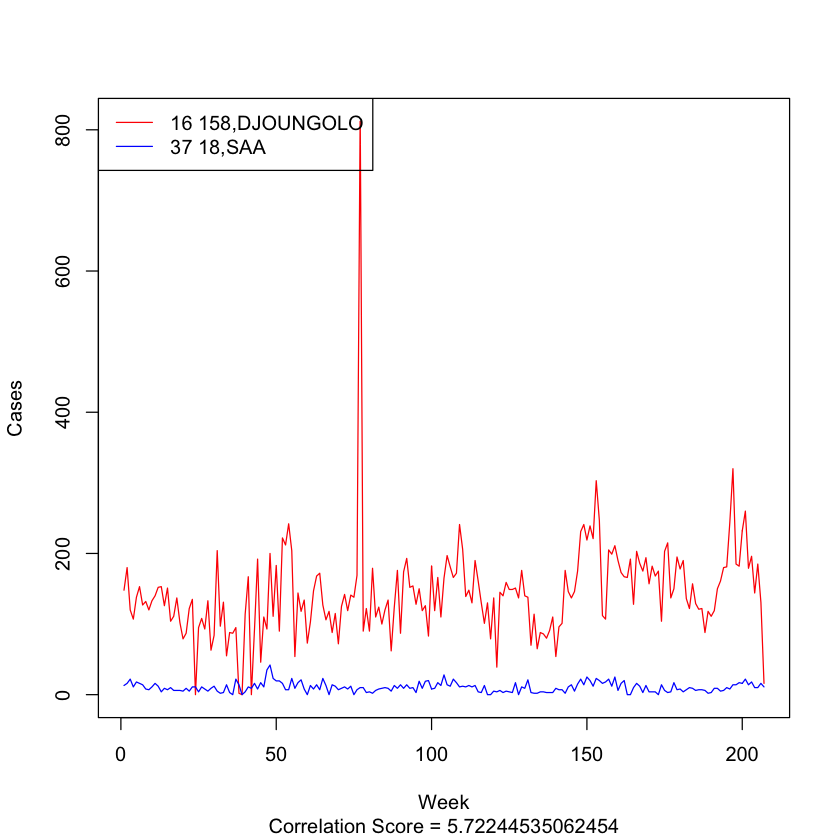

In [68]:
visualize_top_k(score_mat_16,10,top=TRUE,ccf_disp=FALSE)

 [1] 18.17624 18.17651 18.23658 18.28459 18.33746 18.53968 18.88588 19.36355
 [9] 19.60584 21.15533


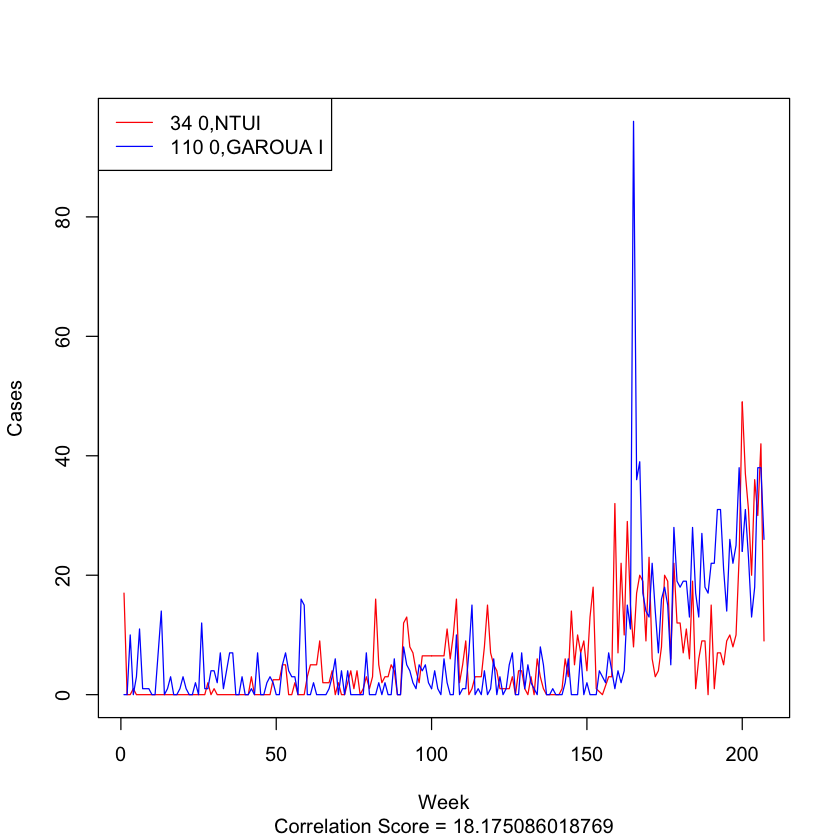

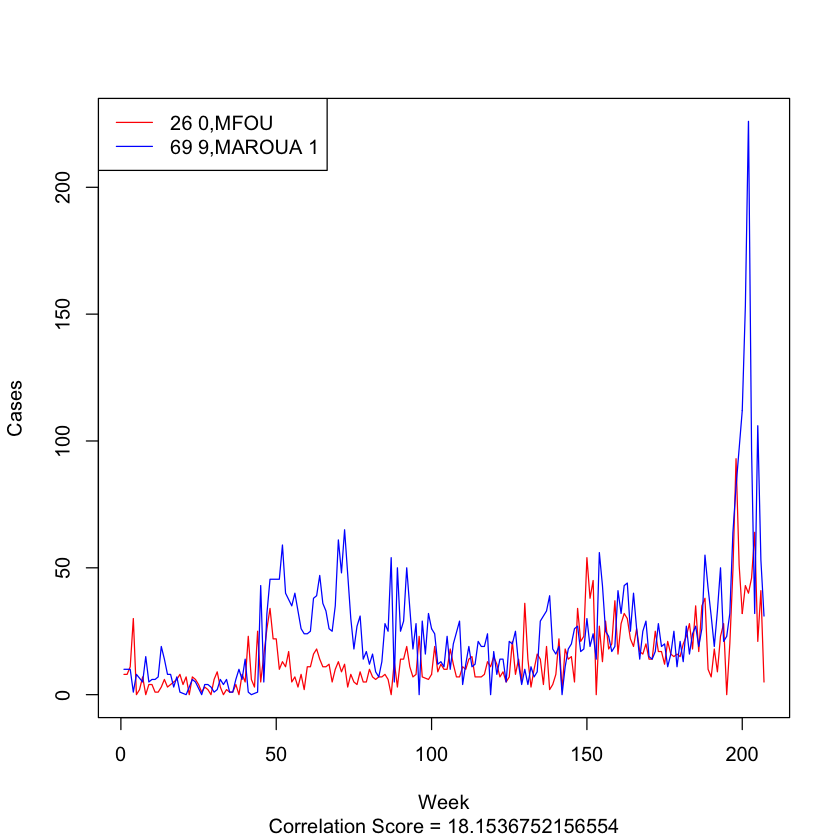

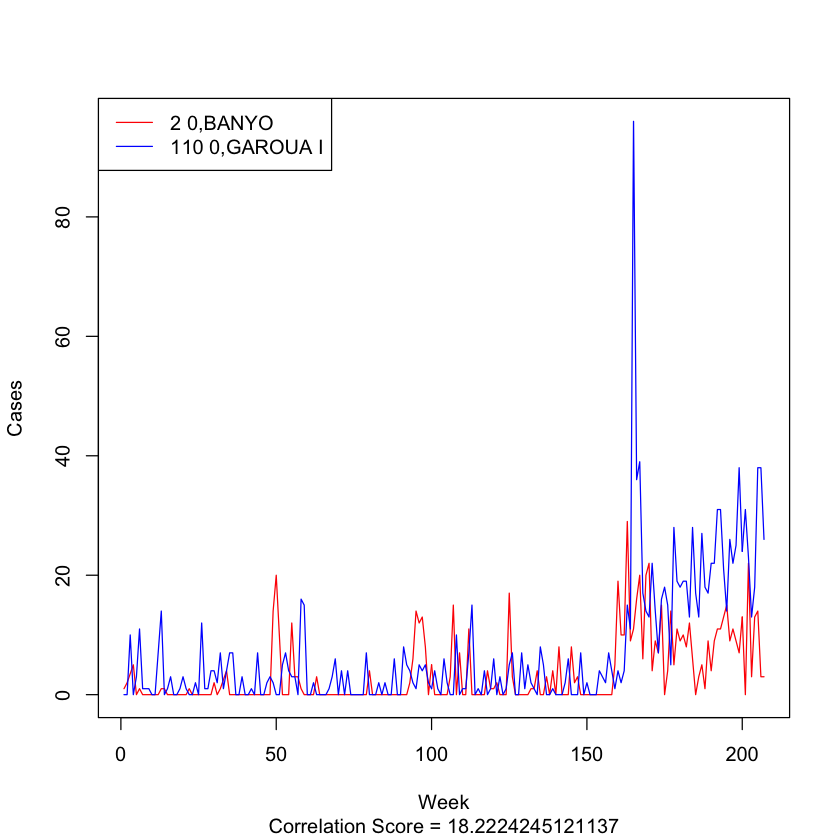

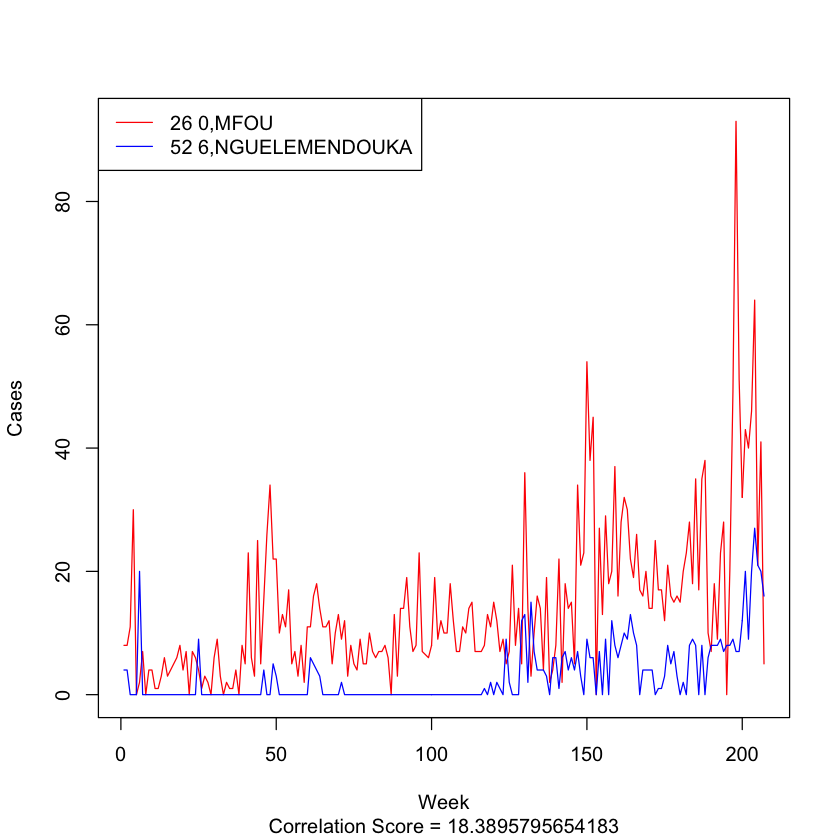

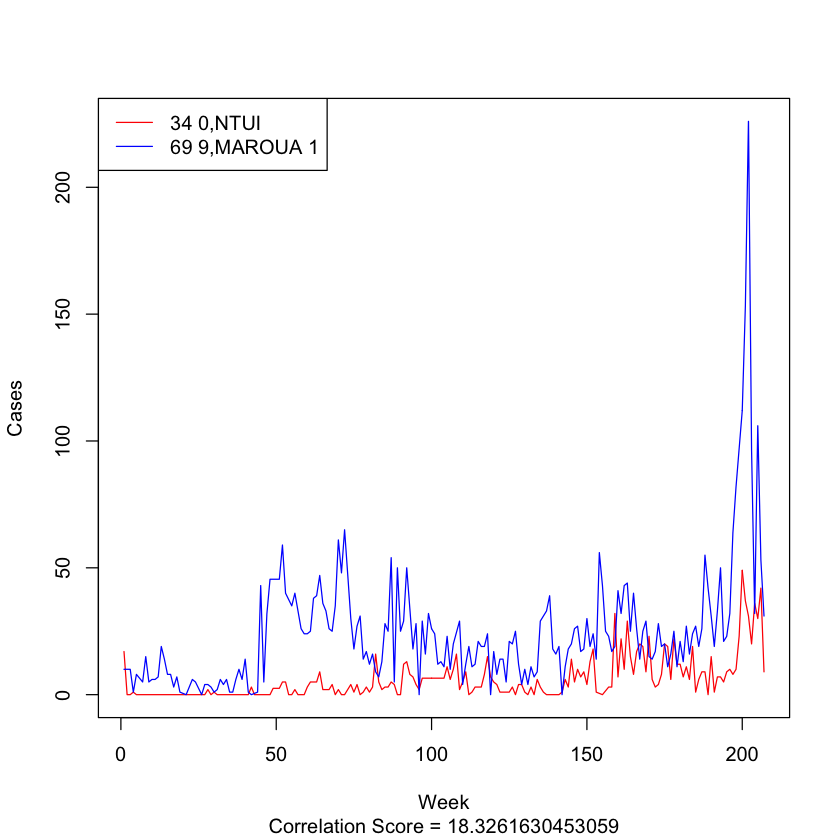

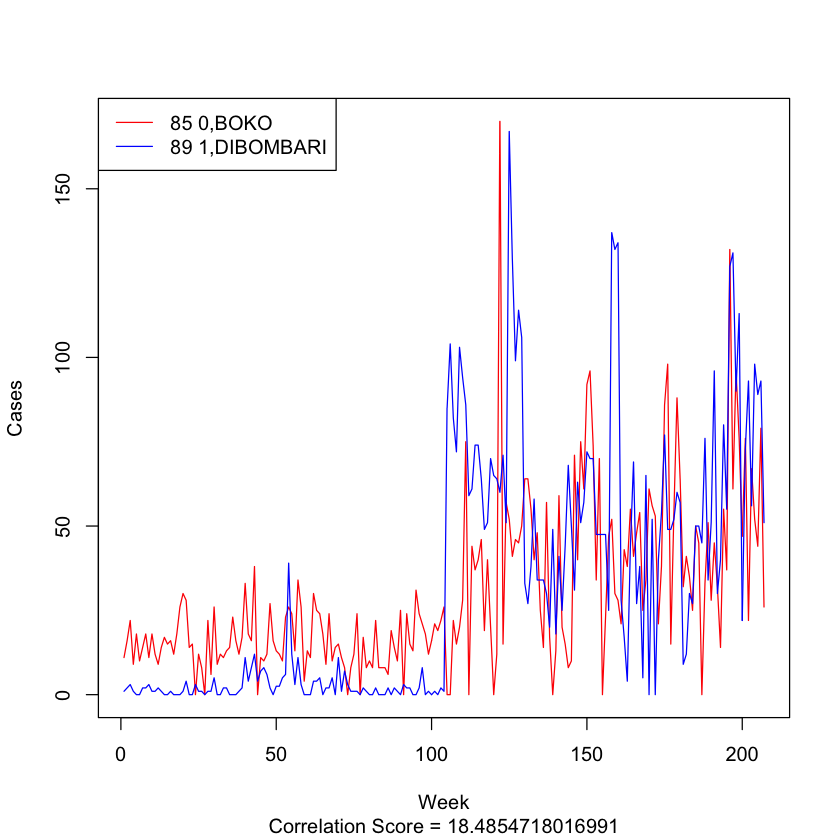

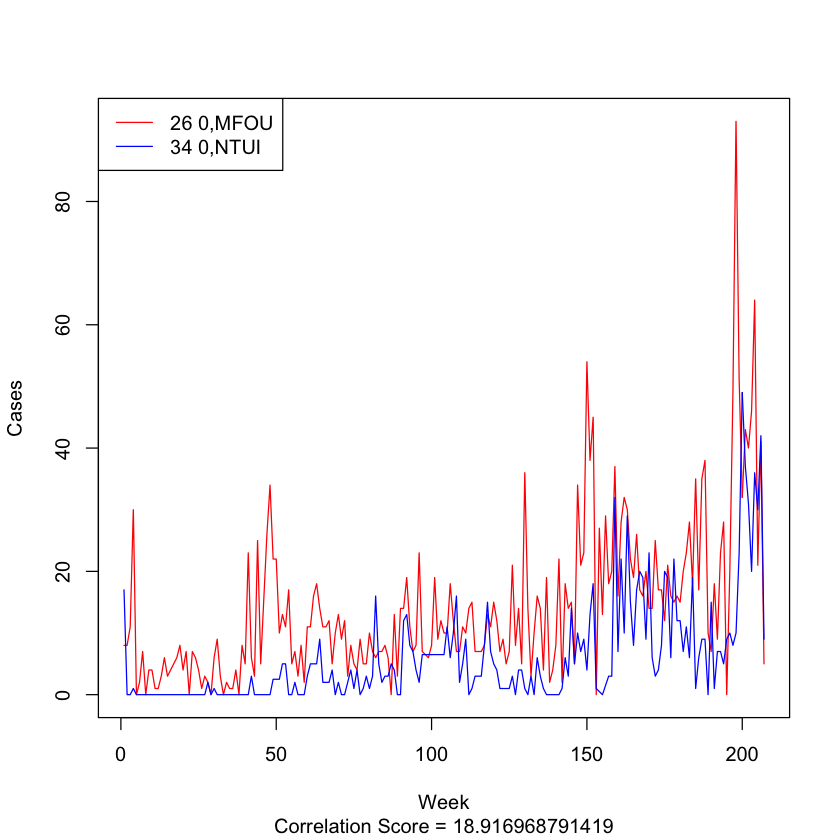

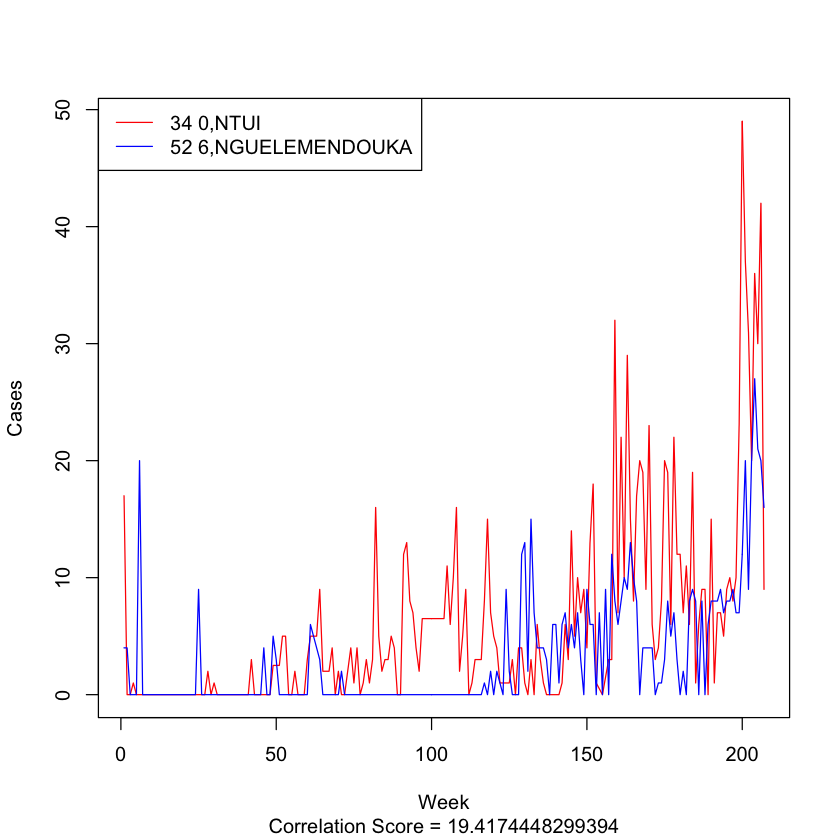

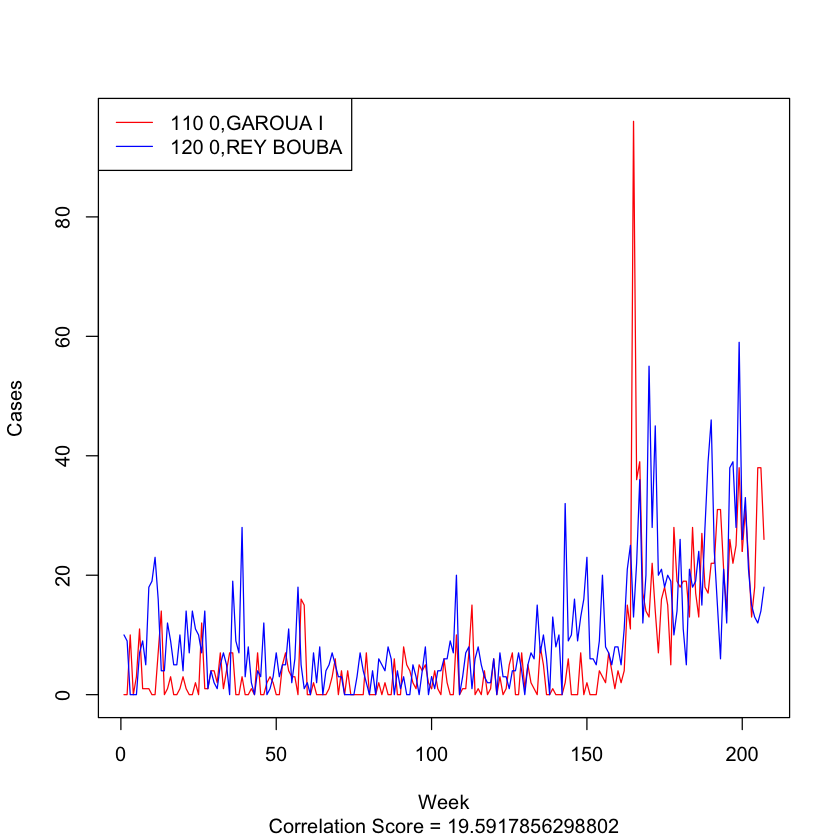

 [1] "0,NTUI X 0,GAROUA I"       "0,MFOU X 9,MAROUA 1"      
 [3] "0,BANYO X 0,GAROUA I"      "0,MFOU X 6,NGUELEMENDOUKA"
 [5] "0,NTUI X 9,MAROUA 1"       "0,BOKO X 1,DIBOMBARI"     
 [7] "0,MFOU X 0,NTUI"           "0,NTUI X 6,NGUELEMENDOUKA"
 [9] "0,GAROUA I X 0,REY BOUBA"  "1,DIBOMBARI X 0,MANJO"    


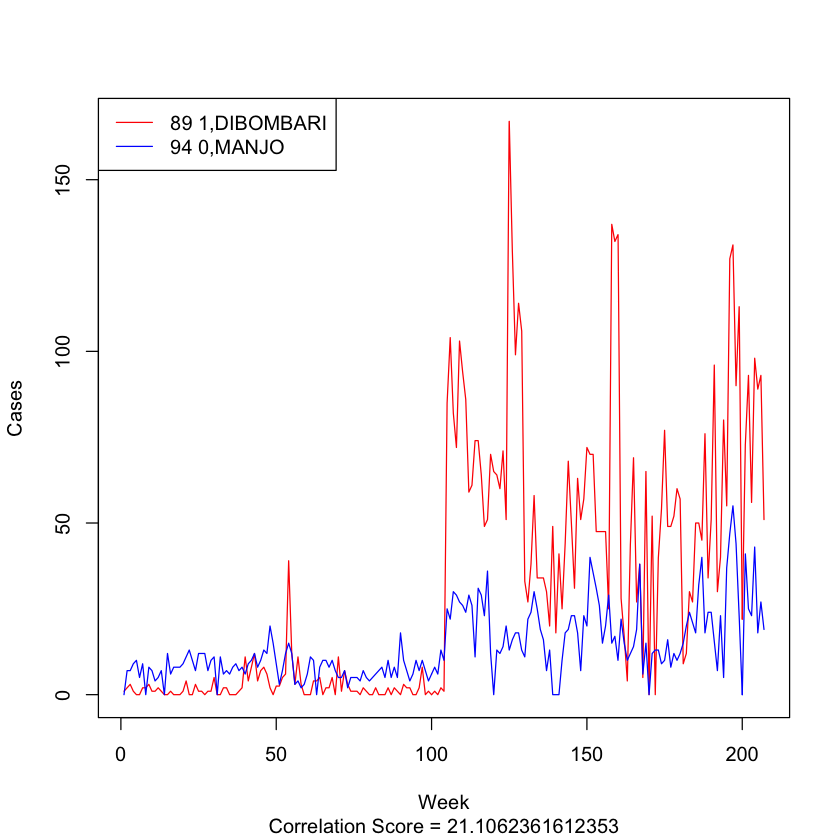

In [69]:
visualize_top_k(score_mat_4yrs,10,top=TRUE,ccf_disp=FALSE)